In [1]:
!pip install simpletransformers yfinance

import pandas as pd
import yfinance as yf
from simpletransformers.classification import ClassificationModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.8/330.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 140.2 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=e29da769074bb9afca28300e1e7880a6395149419100da64039c6e1aca4cc7ee
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model_path = '/content/drive/MyDrive/fiisual_project/bert_model'

model = ClassificationModel(
  'bert',
  model_path,
  num_labels=3,
  use_cuda=False
)

In [4]:
news_df = pd.read_csv('/content/drive/MyDrive/fiisual_project/yahoo_finance_data.csv')
news_df.head()

,Date,Title,Source
0,2025-12-24,"S&P 500 record, commodities, Apple CEO buys Ni...",AAPL
1,2025-12-23,Apple spent 2025 setting itself up for the fut...,AAPL
2,2025-12-23,Apple had a big 2025. Here's what could be in ...,AAPL
3,2025-12-24,Nike Shares Get a Lift After Apple’s Tim Cook ...,AAPL
4,2025-12-24,Apple CEO Tim Cook Discloses $3 Million Nike B...,AAPL


In [5]:
print(news_df['Date'].min(), news_df['Date'].max())

2025-11-04 2025-12-24


In [7]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    812 non-null    object
 1   Title   812 non-null    object
 2   Source  812 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


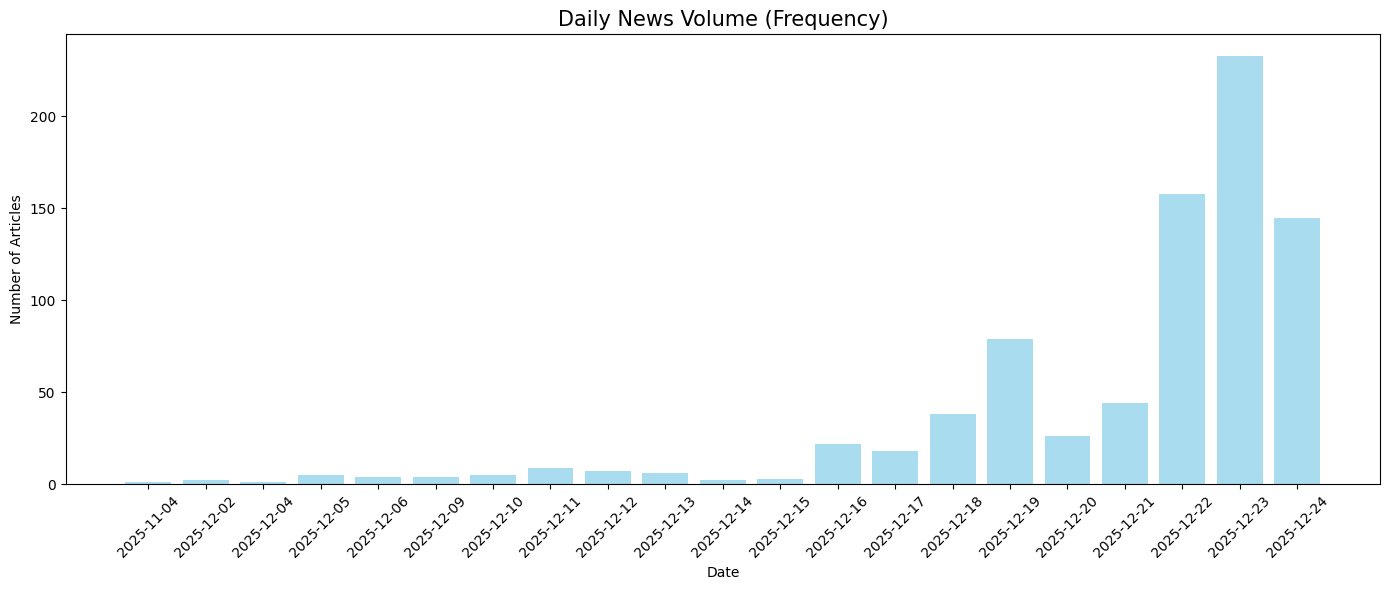

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
daily_counts = news_df.groupby('Date').size()

plt.bar(daily_counts.index, daily_counts.values, color='skyblue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily News Volume (Frequency)', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# 確保 Date 欄位是 datetime 格式，方便比較
news_df['Date'] = pd.to_datetime(news_df['Date'])

news_df = news_df[news_df['Date'] >= '2025-12-16']
print(f"過濾後的剩餘資料量: {len(news_df)}")
print(news_df['Date'].value_counts().sort_index())


過濾後的剩餘資料量: 763
Date
2025-12-16     22
2025-12-17     18
2025-12-18     38
2025-12-19     79
2025-12-20     26
2025-12-21     44
2025-12-22    158
2025-12-23    233
2025-12-24    145
Name: count, dtype: int64


In [5]:
import re
def clean_finance_text(text):
    # 1. 轉小寫
    text = text.lower()
    # 2. 去除 URL 與 HTML 標籤
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # 3. 去除標點符號與特殊數字
    text = re.sub(r'[^\w\s%]', '', text)
    # 4. 去除多餘空格
    text = text.strip()
    return text

news_df['Cleaned_Title'] = news_df['Title'].apply(clean_finance_text)
news_df

,Date,Title,Source,Cleaned_Title
0,2025-12-24,"S&P 500 record, commodities, Apple CEO buys Ni...",AAPL,sp 500 record commodities apple ceo buys nike ...
1,2025-12-23,Apple spent 2025 setting itself up for the fut...,AAPL,apple spent 2025 setting itself up for the fut...
2,2025-12-23,Apple had a big 2025. Here's what could be in ...,AAPL,apple had a big 2025 heres what could be in st...
3,2025-12-24,Nike Shares Get a Lift After Apple’s Tim Cook ...,AAPL,nike shares get a lift after apples tim cook d...
4,2025-12-24,Apple CEO Tim Cook Discloses $3 Million Nike B...,AAPL,apple ceo tim cook discloses 3 million nike bu...
...,...,...,...,...
807,2025-12-16,Tech Innovations to Power Lemonade's Scalable ...,PGR,tech innovations to power lemonades scalable i...
808,2025-12-16,3 Reliable Dividend Stocks Offering Yields Up ...,PGR,3 reliable dividend stocks offering yields up ...
809,2025-12-16,2 Large-Cap Stocks on Our Buy List and 1 We Fi...,PGR,2 largecap stocks on our buy list and 1 we fin...
810,2025-12-12,Why the Market Dipped But Progressive (PGR) Ga...,PGR,why the market dipped but progressive pgr gain...


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

predictions, raw_outputs = model.predict(news_df['Cleaned_Title'].tolist())

news_df['pred_label'] = predictions
def label(label):
    if label == 0: return "Negative"
    if label == 1: return "Neutral"
    if label == 2: return "Positive"
    return 0

news_df['sentiment'] = news_df['pred_label'].apply(label)

  0%|          | 0/1 [00:00<?, ?it/s]

Predicting:   0%|          | 0/9 [00:00<?, ?it/s]

In [7]:
news_df

,Date,Title,Source,Cleaned_Title,pred_label,sentiment
0,2025-12-24,"S&P 500 record, commodities, Apple CEO buys Ni...",AAPL,sp 500 record commodities apple ceo buys nike ...,1,Neutral
1,2025-12-23,Apple spent 2025 setting itself up for the fut...,AAPL,apple spent 2025 setting itself up for the fut...,1,Neutral
2,2025-12-23,Apple had a big 2025. Here's what could be in ...,AAPL,apple had a big 2025 heres what could be in st...,1,Neutral
3,2025-12-24,Nike Shares Get a Lift After Apple’s Tim Cook ...,AAPL,nike shares get a lift after apples tim cook d...,1,Neutral
4,2025-12-24,Apple CEO Tim Cook Discloses $3 Million Nike B...,AAPL,apple ceo tim cook discloses 3 million nike bu...,1,Neutral
...,...,...,...,...,...,...
807,2025-12-16,Tech Innovations to Power Lemonade's Scalable ...,PGR,tech innovations to power lemonades scalable i...,1,Neutral
808,2025-12-16,3 Reliable Dividend Stocks Offering Yields Up ...,PGR,3 reliable dividend stocks offering yields up ...,2,Positive
809,2025-12-16,2 Large-Cap Stocks on Our Buy List and 1 We Fi...,PGR,2 largecap stocks on our buy list and 1 we fin...,1,Neutral
810,2025-12-12,Why the Market Dipped But Progressive (PGR) Ga...,PGR,why the market dipped but progressive pgr gain...,2,Positive


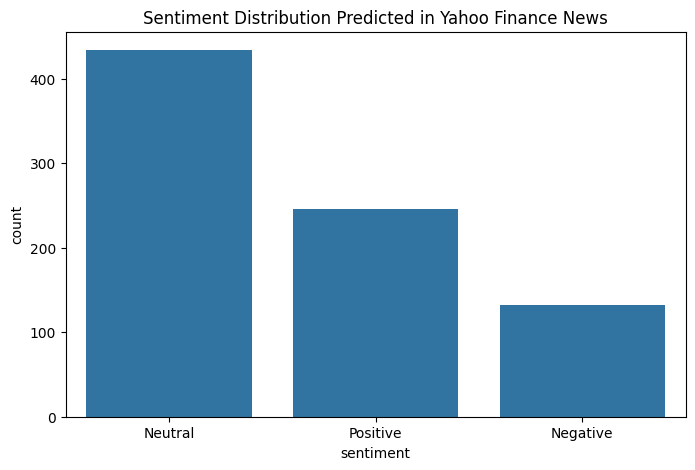

sentiment
Neutral     0.534483
Positive    0.302956
Negative    0.162562
Name: proportion, dtype: float64


In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=news_df)
plt.title('Sentiment Distribution Predicted in Yahoo Finance News')
plt.show()

# 計算比例
print(news_df['sentiment'].value_counts(normalize=True))

In [23]:
score_map = {0: -1, 1: 0, 2: 1}
news_df['sentiment_score'] = news_df['pred_label'].map(score_map)
daily_sentiment = news_df.groupby('Date')['sentiment_score'].mean()

print(daily_sentiment)

Date
2025-12-16    0.227273
2025-12-17   -0.111111
2025-12-18    0.131579
2025-12-19    0.075949
2025-12-20   -0.038462
2025-12-21    0.295455
2025-12-22    0.164557
2025-12-23    0.206009
2025-12-24    0.048276
Name: sentiment_score, dtype: float64


In [31]:
from datetime import timedelta

if isinstance(daily_sentiment, pd.Series):
    daily_sentiment = daily_sentiment.reset_index()

col_name = daily_sentiment.columns[1]
daily_final = daily_sentiment.rename(columns={col_name: 'Score_Daily'})

sentiment_all['Date'] = pd.to_datetime(sentiment_all['Date'])

# 下載股價資料
market_ticker = "^GSPC" # S&P 500
start_date = pd.to_datetime(news_df['Date'].min()) - timedelta(days=5)
end_date = pd.to_datetime(news_df['Date'].max()) + timedelta(days=5)

price_df = yf.download(market_ticker, start=start_date, end=end_date, progress=False)

# 處理 yfinance 可能產生的 MultiIndex
if isinstance(price_df.columns, pd.MultiIndex):
    price_df.columns = price_df.columns.droplevel(1)

price_df = price_df.reset_index()
price_df['Date'] = pd.to_datetime(price_df['Date'])

merged_df = pd.merge(price_df, daily_final, on='Date', how='inner')

merged_df.head()

/tmp/ipython-input-1957364398.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_df = yf.download(market_ticker, start=start_date, end=end_date, progress=False)


,Date,Close,High,Low,Open,Volume,Score_Daily
0,2025-12-16,6800.259766,6819.270020,6759.740234,6800.120117,4983180000,0.227273
1,2025-12-17,6721.430176,6812.259766,6720.430176,6802.879883,5122120000,-0.111111
2,2025-12-18,6774.759766,6816.129883,6758.500000,6778.060059,5101190000,0.131579
3,2025-12-19,6834.500000,6840.020020,6792.620117,6792.620117,8554470000,0.075949
4,2025-12-22,6878.490234,6882.029785,6855.740234,6865.209961,4465030000,0.164557


In [32]:
merged_df['Score_Shift1'] = merged_df['Score_Daily'].shift(1) #看昨天的新聞能不能預測今天
merged_df.head()

,Date,Close,High,Low,Open,Volume,Score_Daily,Score_Shift1
0,2025-12-16,6800.259766,6819.270020,6759.740234,6800.120117,4983180000,0.227273,NaN
1,2025-12-17,6721.430176,6812.259766,6720.430176,6802.879883,5122120000,-0.111111,0.227273
2,2025-12-18,6774.759766,6816.129883,6758.500000,6778.060059,5101190000,0.131579,-0.111111
3,2025-12-19,6834.500000,6840.020020,6792.620117,6792.620117,8554470000,0.075949,0.131579
4,2025-12-22,6878.490234,6882.029785,6855.740234,6865.209961,4465030000,0.164557,0.075949


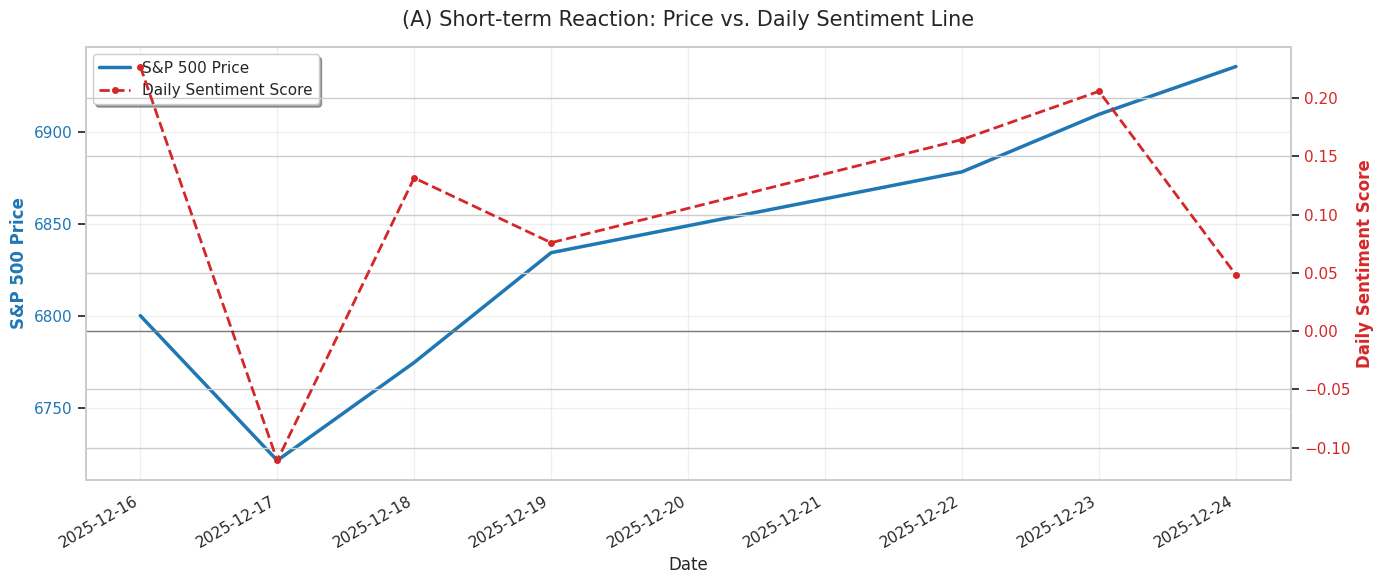

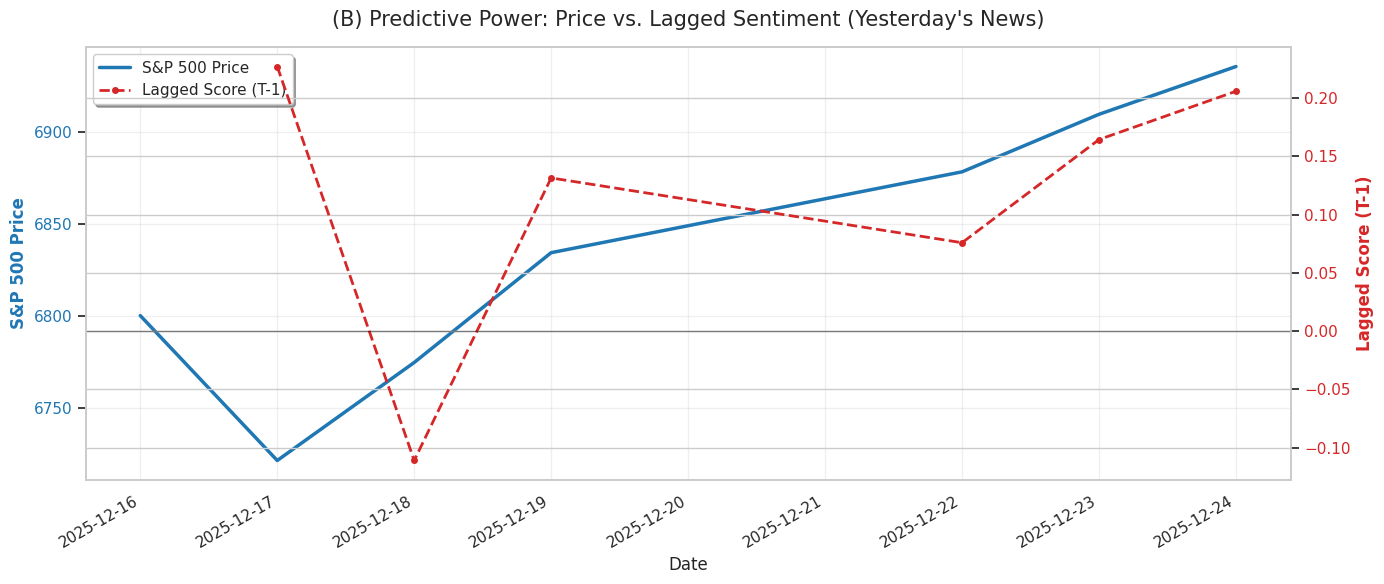

In [34]:
import matplotlib.dates as mdates

# 設定共用繪圖函數
def plot_dual_lines(df, sentiment_col, title, sent_label):
  sns.set(style="whitegrid")
  fig, ax1 = plt.subplots(figsize=(14, 6))

  dates = df['Date']

  # S&P500
  color_price = '#1f77b4'
  ax1.set_xlabel('Date')
  ax1.set_ylabel('S&P 500 Price', color=color_price, fontweight='bold', fontsize=12)
  line1 = ax1.plot(dates, df['Close'], color=color_price, linewidth=2.5, linestyle='-', label='S&P 500 Price')
  ax1.tick_params(axis='y', labelcolor=color_price)
  ax1.grid(True, alpha=0.3)

  # 情緒指標
  ax2 = ax1.twinx()
  color_sent = '#d62728'
  ax2.set_ylabel(sent_label, color=color_sent, fontweight='bold', fontsize=12)

  line2 = ax2.plot(dates, df[sentiment_col], color=color_sent, linewidth=2, linestyle='--', marker='o', markersize=4, label=sent_label)
  ax2.tick_params(axis='y', labelcolor=color_sent)

  baseline = 1.0 if df[sentiment_col].max() > 1.5 else 0.0
  ax2.axhline(baseline, color='black', alpha=0.4, linestyle='-', linewidth=1)

  lines = line1 + line2
  labels = [l.get_label() for l in lines]
  ax1.legend(lines, labels, loc='upper left', frameon=True, shadow=True)

  # 標題與排版
  plt.title(title, fontsize=15, pad=15)
  #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
  plt.gcf().autofmt_xdate()
  plt.tight_layout()
  plt.show()


# 單日情緒
plot_dual_lines(
    merged_df,
    'Score_Daily',
    '(A) Short-term Reaction: Price vs. Daily Sentiment Line',
    'Daily Sentiment Score'
)

# 趨勢情緒


# 預測訊號
plot_dual_lines(
    merged_df,
    'Score_Shift1',
    '(B) Predictive Power: Price vs. Lagged Sentiment (Yesterday\'s News)',
    'Lagged Score (T-1)'
)

In [35]:
from scipy import stats

df_test = merged_df.dropna().copy()



metrics = {
    "Daily Sentiment Score v.s. Stock Price": "Score_Daily",
    "Yesterday's Sentiment Score v.s Stock Price": "Score_Shift1"
}

for name, col in metrics.items():
  if col in df_test.columns:
    print(f"【{name}】")

    corr, p_val = stats.pearsonr(df_test[col], df_test['Close'])
    print(f"   - 相關係數: {corr:.4f}")
    print(f"   - P-value: {p_val:.4f}")


【Daily Sentiment Score v.s. Stock Price】
   - 相關係數: 0.6115
   - P-value: 0.1970
【Yesterday's Sentiment Score v.s Stock Price】
   - 相關係數: 0.2364
   - P-value: 0.6520


In [36]:
from scipy import stats

df_test = merged_df.dropna().copy()
df_test['Return'] = df_test['Close'].pct_change()
df_test = df_test.dropna()


metrics = {
    "Daily sentiment score v.s. Daily return": "Score_Daily",
    "Yesterday's sentiment score v.s Daily return": "Score_Shift1"
}

for name, col in metrics.items():
  if col in df_test.columns:
    print(f"【{name}】")

    corr, p_val = stats.pearsonr(df_test[col], df_test['Return'])
    print(f"   - 相關係數: {corr:.4f}")
    print(f"   - P-value: {p_val:.4f}")


【Daily sentiment score v.s. Daily return】
   - 相關係數: -0.0983
   - P-value: 0.8750
【Yesterday's sentiment score v.s Daily return】
   - 相關係數: -0.6104
   - P-value: 0.2742
